In [119]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import random
import matplotlib.colors as colors
import os

###
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.style.use('seaborn-paper')

In [120]:
def gather_loss(losses,label,threshold = None):
    loss_dict = {}
    acc_dict = {}
    data_dict = {}

    count = 0
    for k in losses:
        cumulative_data=0
        loss_list = []
        acc_list = []
        data_list = []
        epoch_acc_list = []
        epoch_loss_list = []
        epoch_data_list = []
        epoch_num = 1
        for j in os.listdir(k):
            if not j.endswith('.json'):
                continue
            with open(k + '/' + j ,'r') as f:
                a = json.load(f)
            for i in range(len(a)):
                if('loss' in a[i].keys()):
                    if a[i]['epoch'] <= epoch_num:
                        if('n_bits_to_transmit' in a[i].keys() and a[i]['split'] == 'train'):
                            if(threshold is not None):
                                if(a[i]['loss'] <= threshold):
                                    acc_list.append(a[i]['top1'])
                                    loss_list.append(a[i]['loss'])
                                    cumulative_data+= a[i]['n_bits_to_transmit']
                                    data_list.append(cumulative_data)
                            else:
                                acc_list.append(a[i]['top1'])
                                loss_list.append(a[i]['loss'])
                                cumulative_data+= a[i]['n_bits_to_transmit']
                                data_list.append(cumulative_data)                                  
                    else:
                        epoch_loss_list.append(np.mean(loss_list))
                        epoch_acc_list.append(np.mean(acc_list))
                        epoch_data_list.append(np.mean(data_list))
                        loss_list = []
                        acc_list = []
                        data_list = []
                        epoch_num += 1            
                else:
                    continue;
        loss_dict[label[count]] = epoch_loss_list
        acc_dict[label[count]] = epoch_acc_list
        data_dict[label[count]] = epoch_data_list
        count+=1
    return loss_dict,acc_dict,data_dict

In [11]:
#torus
n4 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621895491_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n8 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621898435_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n12 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621901298_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n16 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621904289_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n20 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621906948_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'

#ring
r4 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621842329_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r8 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621844888_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r12 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621912769_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r16 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621918058_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r20 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621915467_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'

4 -> 104677.78587341309 -> 299 epochs
8 -> 120867.20294952393 -> 299 epochs
12 -> 126624.99332427979 -> 299 epochs
16 -> 109115.42987823486 -> 252 epochs
20 -> 84624.33471679688 -> 195 epochs


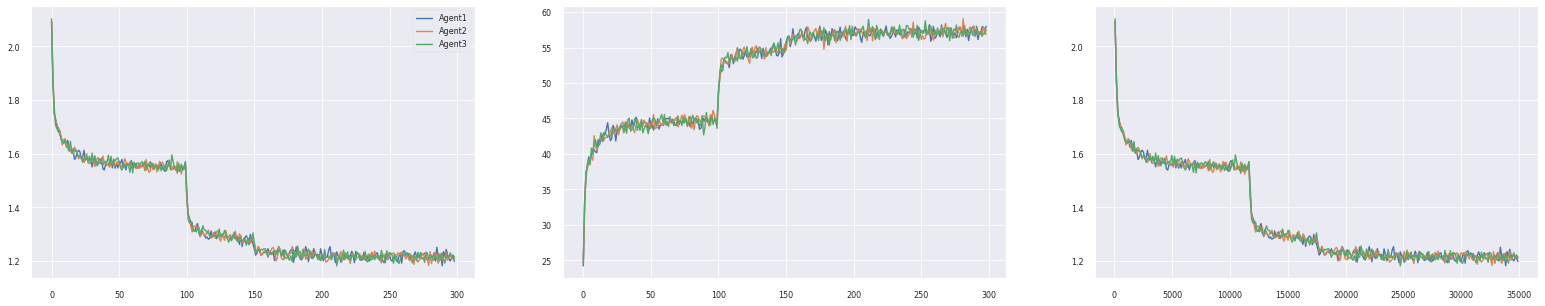

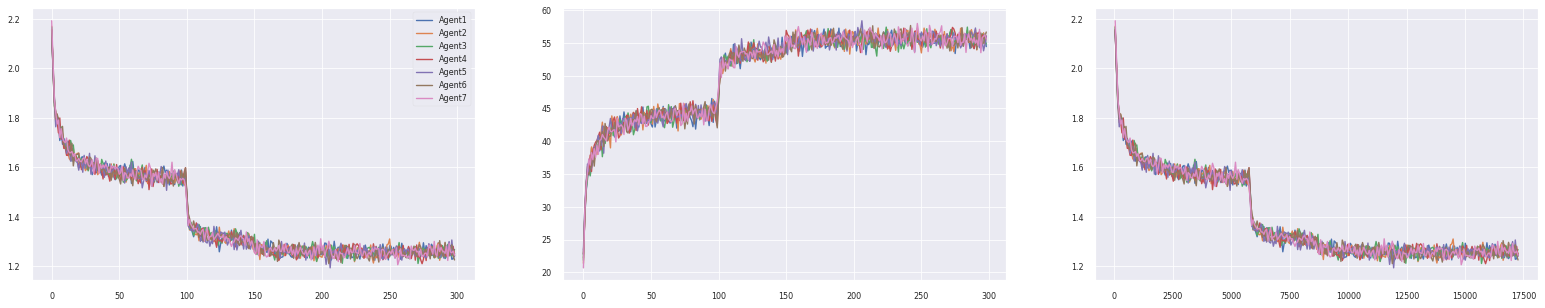

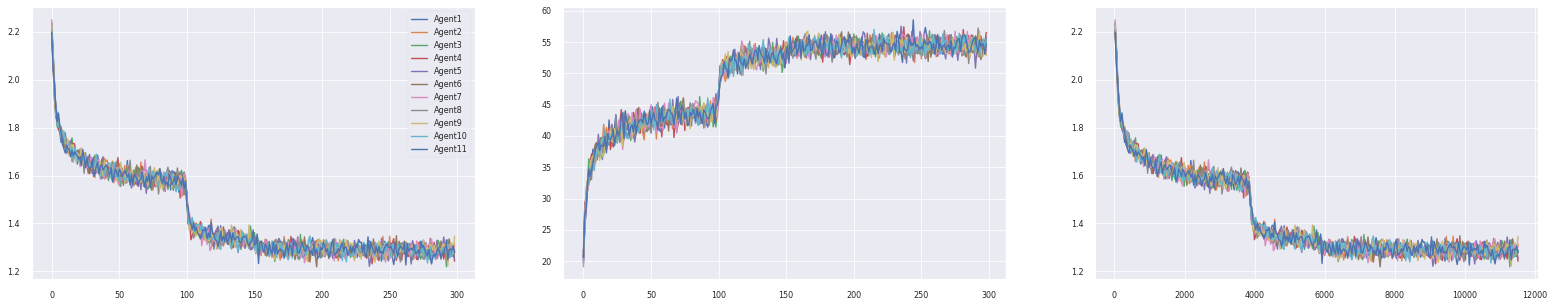

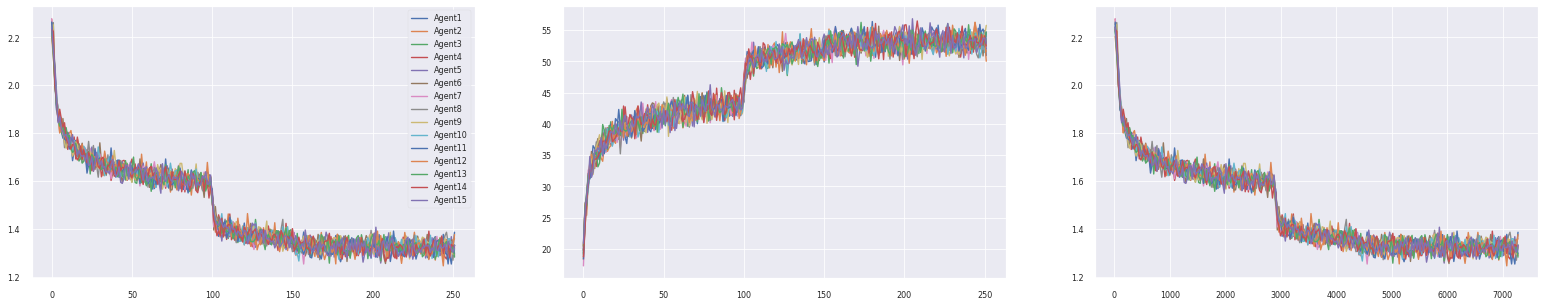

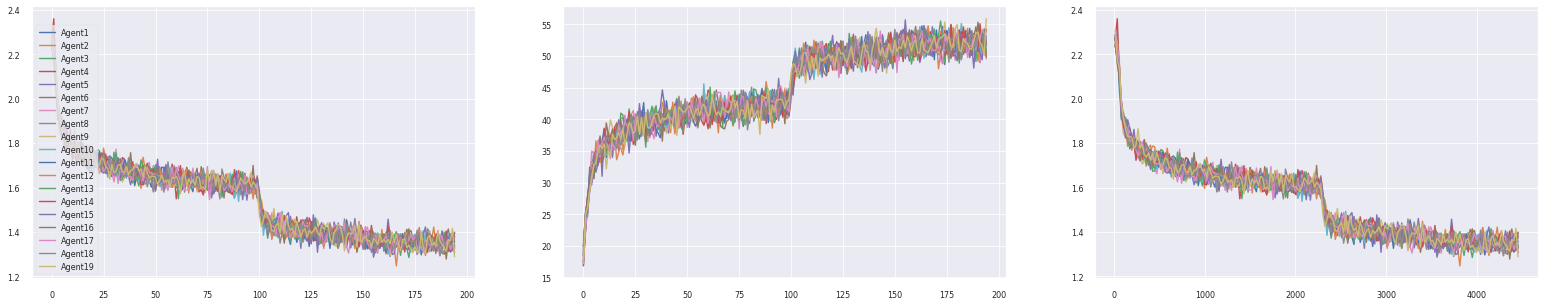

In [13]:
#4 nodes torus

count=0
l = [n4,n8,n12,n16,n20]
r = [r4,r8,r12,r16,r20]
for j in [4,8,12,16,20]:
    data_used = 0
    fig, ax = plt.subplots(1, 3,figsize=(27,5))
    for i in range(1,j):
        weird = r[count] + str(i)
        ld1,ad1,dd1 = gather_loss([weird],['weird'])

        ax[0].plot(ld1['weird'],label = 'Agent' + str(i))
        ax[1].plot(ad1['weird'])
        ax[2].plot(dd1['weird'],ld1['weird'])
        data_used+= dd1['weird'][-1]
        ax[0].legend()
    count+=1
    print("{} -> {} -> {} epochs".format(j,data_used,len(ld1['weird'])))

In [16]:
data_used

67152.12821960449

In [121]:
def gather_loss2(losses,label,threshold = None, mean = False):
    loss_dict = {}
    acc_dict = {}
    data_dict = {}
    for i in range(len(label)):
        loss_dict[label[i]] = {
                              'final_loss':[]}
        
        acc_dict[label[i]] = {
                              'final_acc':[]}
    loss_list = []
    acc_list = []
    
    count = 0
    for path in losses:
        final_agent_epoch_loss = np.zeros(300)
        final_agent_epoch_acc = np.zeros(300)
        for agent in range(0,len(os.listdir(path))-1):
            agent_epoch_loss = []
            agent_epoch_acc = []
            

            for file in os.listdir(os.path.join(path,str(agent))):
                if not file.endswith('.json'):
                    continue
                with open(os.path.join(path,str(agent),file) ,'r') as f:
                    a = json.load(f)
                    for i in range(len(a)):
                        if('loss' in a[i].keys()):
                            if(a[i]['split'] == 'test'): #recording loss value of the local model for every epoch
                                if(a[i]['type'] == 'local_model'):
                                    agent_epoch_loss.append(a[i]['loss'])
                                    agent_epoch_acc.append(a[i]['top1'])
            #from IPython import embed;embed()
            final_agent_epoch_loss.resize(len(agent_epoch_loss))
            final_agent_epoch_loss += np.array(agent_epoch_loss)
            
            final_agent_epoch_acc.resize(len(agent_epoch_acc))
            final_agent_epoch_acc += np.array(agent_epoch_acc)

        #from IPython import embed;embed()
        final_agent_epoch_loss /= len(os.listdir(path))-1
        final_agent_epoch_acc /= len(os.listdir(path))-1
        loss_dict[label[count]]['final_loss'] = final_agent_epoch_loss
        acc_dict[label[count]]['final_acc'] = final_agent_epoch_acc
            #from IPython import embed;embed()
        
        count+=1
#     if(mean is True):
#         for i in range(len(label)):
#             loss_dict[label[i]]['min_loss'] = np.mean(loss_dict[label[i]]['min_loss'])
#             loss_dict[label[i]]['final_loss'] = np.mean(loss_dict[label[i]]['final_loss'])
            
#             acc_dict[label[i]]['max_acc'] = np.mean(acc_dict[label[i]]['max_acc'])
#             acc_dict[label[i]]['final_acc'] = np.mean(acc_dict[label[i]]['final_acc'])
                            
    return loss_dict,acc_dict

## Figure 4

# Initialize Paths to each trial

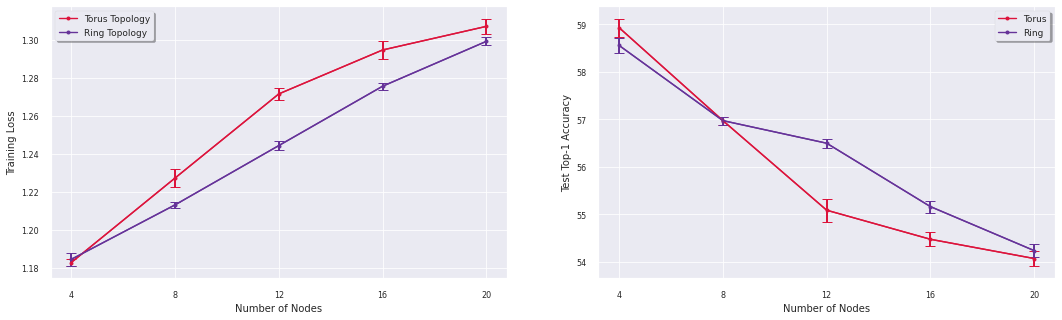

In [265]:
fig, ax = plt.subplots(1, 2,figsize=(18,5))
n4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621992117_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622018245_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622043210_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622068363_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621994942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622020811_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622045762_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622071166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621997813_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622023220_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622048166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622074058_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]
       
n16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622000952_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622026019_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622050942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622076890_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

n20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622003595_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622028727_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622053472_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622079471_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

#ring
r4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621979891_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622005845_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622030978_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622055739_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]
      
r8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621982434_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622008391_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622033500_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622058470_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
     ]

r12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621984779_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622010747_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622035853_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622060932_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

r16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621987447_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622013453_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622038533_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622063719_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

r20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621990035_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622016076_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622041153_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622066254_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]
############
#Initialize lists

min_loss_t = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_t = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_t = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_t = np.array([0.0,0.0,0.0,0.0,0.0])

min_loss_r = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_r = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_r = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_r = np.array([0.0,0.0,0.0,0.0,0.0])

err_min_loss_t = [[],[],[],[],[]]
err_max_acc_t = [[],[],[],[],[]]
err_final_loss_t = [[],[],[],[],[]]
err_final_acc_t = [[],[],[],[],[]]

err_min_loss_r = [[],[],[],[],[]]
err_max_acc_r = [[],[],[],[],[]]
err_final_loss_r = [[],[],[],[],[]]
err_final_acc_r = [[],[],[],[],[]]
############
trials = np.min([len(n4),len(n8),len(n12),len(n16),len(n20),len(r4),len(r8),len(r12),len(r16),len(r20)])
for i in range(trials):
# for i in range(1):
    temp = [n4[i],n8[i],n12[i],n16[i],n20[i],r4[i],r8[i],r12[i],r16[i],r20[i]]
    labels = ['n4t', 'n8t', 'n12t', 'n16t', 'n20t', 'n4r','n8r','n12r', 'n16r', 'n20r']
    loss_dict,acc_dict = gather_loss2(temp,labels,threshold=2.0)

    # for i in range(len(labels)):
    #     acc_dict[labels[i]] = [x for x in acc_dict[labels[i]] if not np.isnan(x)]
    #     loss_dict[labels[i]] = [x for x in loss_dict[labels[i]] if not np.isnan(x)]

    stopat = len(loss_dict['n20t']['final_loss'])

    
    min_loss_t += np.array([min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
    temp1 = np.array([min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
        
    max_acc_t += np.array([max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    temp2 = np.array([max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    
    
    final_loss_t += np.array([loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])
    temp3 = np.array([loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])

    final_acc_t += np.array([acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])
    temp4 = np.array([acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])

    ###########
    min_loss_r += np.array([min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])
    temp5 = np.array([min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])

    max_acc_r += np.array([max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])
    temp6 = np.array([max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])

    final_loss_r += np.array([loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])
    temp7 = np.array([loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])

    final_acc_r += np.array([acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    temp8 = np.array([acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    
    for k in range(0,5): #adding data for error bars
        err_min_loss_t[k].append(temp1[k])
        err_max_acc_t[k].append(temp2[k])
        err_final_loss_t[k].append(temp3[k])
        err_final_acc_t[k].append(temp4[k])
        
        err_min_loss_r[k].append(temp5[k])
        err_max_acc_r[k].append(temp6[k])
        err_final_loss_r[k].append(temp7[k])
        err_final_acc_r[k].append(temp8[k])

min_loss_t /= float(trials)
max_acc_t /= float(trials)
final_loss_t /= float(trials)
final_acc_t /= float(trials)

min_loss_r /= float(trials)
max_acc_r /= float(trials)
final_loss_r /= float(trials)
final_acc_r /= float(trials)
    
nodes = [4,8,12,16,20]
    
ax[1].plot(nodes, max_acc_t,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = 'Torus')
err_max_acc_t = [np.std(err_max_acc_t[l]) for l in range(len(err_max_acc_t))]
(_, caps, _) = ax[1].errorbar(nodes, max_acc_t, yerr=err_max_acc_t, capsize=5, elinewidth=2, color='crimson')

for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('crimson')
    
    
ax[1].plot(nodes, max_acc_r,'-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = 'Ring')
ax[1].set_xticks([4,8,12,16,20])
err_max_acc_r = [np.std(err_max_acc_r[l]) for l in range(len(err_max_acc_r))]
(_, caps, _) = ax[1].errorbar(nodes, max_acc_r, yerr=err_max_acc_r, capsize=5, elinewidth=2,color='rebeccapurple')

for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('rebeccapurple')
    
    

ax[0].plot(nodes, min_loss_t,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = 'Torus Topology')
err_min_loss_t = [np.std(err_min_loss_t[l]) for l in range(len(err_min_loss_t))]
(_, caps, _) = ax[0].errorbar(nodes, min_loss_t, yerr=err_min_loss_t, capsize=5, elinewidth=2,color='crimson')

for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('crimson')
    
    
ax[0].plot(nodes, min_loss_r,'-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = 'Ring Topology')
ax[0].set_xticks([4,8,12,16,20])
err_min_loss_r = [np.std(err_min_loss_r[l]) for l in range(len(err_min_loss_r))]
(_, caps, _) = ax[0].errorbar(nodes, min_loss_r, yerr=err_min_loss_r, capsize=5, elinewidth=2, color='rebeccapurple')

for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('rebeccapurple')
    
    
ax[0].legend(prop={'size': 9},
          ncol=1, fancybox=True, shadow=True)
ax[1].legend(prop={'size': 9},
          ncol=1, fancybox=True, shadow=True)
ax[0].set_xlabel('Number of Nodes',fontsize=10)
ax[1].set_xlabel('Number of Nodes',fontsize=10)
ax[0].set_ylabel('Training Loss',fontsize=10)
ax[1].set_ylabel('Test Top-1 Accuracy',fontsize=10)

plt.savefig('topology.pdf')

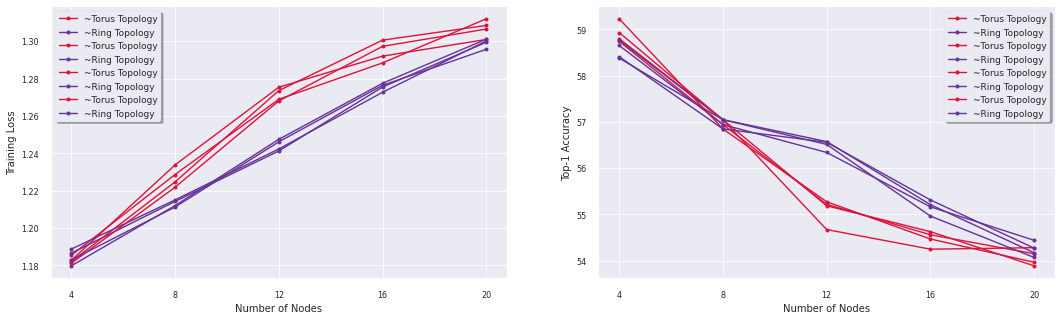

In [262]:
fig, ax = plt.subplots(1, 2,figsize=(18,5))
n4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621992117_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622018245_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622043210_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622068363_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621994942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622020811_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622045762_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622071166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621997813_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622023220_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622048166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622074058_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]
       
n16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622000952_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622026019_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622050942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622076890_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

n20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622003595_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622028727_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622053472_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622079471_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

#ring
r4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621979891_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622005845_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622030978_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622055739_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]
      
r8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621982434_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622008391_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622033500_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622058470_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
     ]

r12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621984779_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622010747_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622035853_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622060932_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

r16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621987447_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622013453_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622038533_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622063719_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

r20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621990035_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622016076_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622041153_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622066254_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]
############
#Initialize lists

min_loss_t = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_t = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_t = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_t = np.array([0.0,0.0,0.0,0.0,0.0])

min_loss_r = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_r = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_r = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_r = np.array([0.0,0.0,0.0,0.0,0.0])

err_min_loss_t = [[],[],[],[],[]]
err_max_acc_t = [[],[],[],[],[]]
err_final_loss_t = [[],[],[],[],[]]
err_final_acc_t = [[],[],[],[],[]]

err_min_loss_r = [[],[],[],[],[]]
err_max_acc_r = [[],[],[],[],[]]
err_final_loss_r = [[],[],[],[],[]]
err_final_acc_r = [[],[],[],[],[]]
############
trials = np.min([len(n4),len(n8),len(n12),len(n16),len(n20),len(r4),len(r8),len(r12),len(r16),len(r20)])
for i in range(trials):
# for i in range(1):
    temp = [n4[i],n8[i],n12[i],n16[i],n20[i],r4[i],r8[i],r12[i],r16[i],r20[i]]
    labels = ['n4t', 'n8t', 'n12t', 'n16t', 'n20t', 'n4r','n8r','n12r', 'n16r', 'n20r']
    loss_dict,acc_dict = gather_loss2(temp,labels,threshold=2.0)

    # for i in range(len(labels)):
    #     acc_dict[labels[i]] = [x for x in acc_dict[labels[i]] if not np.isnan(x)]
    #     loss_dict[labels[i]] = [x for x in loss_dict[labels[i]] if not np.isnan(x)]

    stopat = len(loss_dict['n20t']['final_loss'])

    
    min_loss_t = np.array([min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
    temp1 = np.array([min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
        
    max_acc_t = np.array([max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    temp2 = np.array([max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    
    
    final_loss_t = np.array([loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])
    temp3 = np.array([loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])

    final_acc_t = np.array([acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])
    temp4 = np.array([acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])

    ###########
    min_loss_r = np.array([min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])
    temp5 = np.array([min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])

    max_acc_r = np.array([max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])
    temp6 = np.array([max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])

    final_loss_r = np.array([loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])
    temp7 = np.array([loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])

    final_acc_r = np.array([acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    temp8 = np.array([acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    

# min_loss_t /= float(trials)
# max_acc_t /= float(trials)
# final_loss_t /= float(trials)
# final_acc_t /= float(trials)

# min_loss_r /= float(trials)
# max_acc_r /= float(trials)
# final_loss_r /= float(trials)
# final_acc_r /= float(trials)
    
    nodes = [4,8,12,16,20]

    ax[1].plot(nodes, max_acc_t,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = '~Torus Topology')



    ax[1].plot(nodes, max_acc_r,'-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = '~Ring Topology')
    ax[1].set_xticks([4,8,12,16,20])




    ax[0].plot(nodes, min_loss_t,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = '~Torus Topology')



    ax[0].plot(nodes, min_loss_r,'-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = '~Ring Topology')
    ax[0].set_xticks([4,8,12,16,20])



    ax[0].legend(prop={'size': 9},
              ncol=1, fancybox=True, shadow=True)
    ax[1].legend(prop={'size': 9},
              ncol=1, fancybox=True, shadow=True)
    ax[0].set_xlabel('Number of Nodes',fontsize=10)
    ax[1].set_xlabel('Number of Nodes',fontsize=10)
    ax[0].set_ylabel('Training Loss',fontsize=10)
    ax[1].set_ylabel('Top-1 Accuracy',fontsize=10)

# Draw Topology and calculate spectral gap


In [110]:
import networkx
import scipy as sp
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    all_rows = range(0, adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n)
    gr.add_edges_from(edges)
    labels = dict(zip(gr, mylabels))
    nx.draw(gr, node_size=900, labels=labels, with_labels=True)
    plt.show()

def define_graph(n_mpi_process, topology):
    
    if(topology == 'torus'):
        # get proper _width and _height.
        m = int(np.sqrt(n_mpi_process))
        while True:
            if n_mpi_process % m == 0:
                n = int(n_mpi_process / m)
                break
            else:
                m -= 1

        # define the graph.
        graph = networkx.generators.lattice.grid_2d_graph(m, n, periodic=True)

        # get the mixing matrix.
        mixing_matrix = networkx.adjacency_matrix(graph).toarray()
        for i in range(0, mixing_matrix.shape[0]):
            mixing_matrix[i][i] = 1
        rows = (mixing_matrix != 0).sum(1)
        mixing_matrix = mixing_matrix/rows[0]

#         print("*************************************")
#         print(mixing_matrix)
#         print("*************************************")
        print(np.sort(np.linalg.eigvals(mixing_matrix))[::-1][0] - np.sort(np.linalg.eigvals(mixing_matrix))[::-1][1])
        show_graph_with_labels(mixing_matrix, list(range(n_mpi_process)))
    if(topology == 'ring'):
        assert n_mpi_process > 2

        # create ring matrix
        diag_rows = np.array(
            [
                [1 / 3 for _ in range(n_mpi_process)],
                [1 / 3 for _ in range(n_mpi_process)],
                [1 / 3 for _ in range(n_mpi_process)],
            ]
        )
        positions = [-1, 0, 1]
        mixing_matrix = sp.sparse.spdiags(diag_rows, positions, n_mpi_process, n_mpi_process).tolil()

        mixing_matrix[0, n_mpi_process - 1] = 1 / 3
        mixing_matrix[n_mpi_process - 1, 0] = 1 / 3
        mixing_matrix = mixing_matrix.tocsr()
        mixing_matrix = mixing_matrix.toarray()
#         print("*************************************")
#         print(mixing_matrix)
#         print("*************************************")
        print(np.sort(np.linalg.eigvals(mixing_matrix))[::-1][0] - np.sort(np.linalg.eigvals(mixing_matrix))[::-1][1])
        show_graph_with_labels(mixing_matrix, list(range(n_mpi_process)))
        

0.4999999999999998


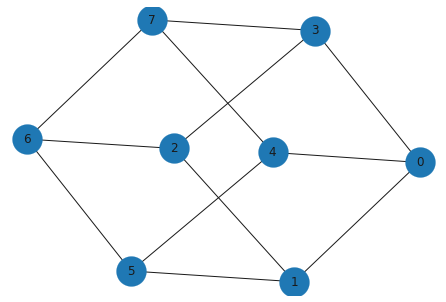

In [118]:
define_graph(8,'torus')

usage: ipykernel_launcher.py [-h] [--data DATA]
                             [--mlp_num_layers MLP_NUM_LAYERS]
                             [--mlp_hidden_size MLP_HIDDEN_SIZE]
                             [--drop_rate DROP_RATE]
                             [--weight_path WEIGHT_PATH]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/1006/jupyter/kernel-a7f9facb-3e37-4ce0-998f-ad35421cbfcb.json


SystemExit: 2

/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
